# Importing Libraries and basic dataset pre-processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

In [ ]:
dataset=pd.read_csv('/content/autism_screening.csv')
dataset=dataset.replace(to_replace="?",value="unknown")
#dataset=dataset.replace(to_replace='NaN',value='unknown')
dataset.columns.drop("used_app_before")
dataset.columns.drop("age_desc")
dataset.columns.drop("relation")
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,unknown,no,no,Egypt,no,2.0,18 and more,unknown,NO


In [ ]:
dataset.shape

(704, 21)

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [ ]:
print(dataset.describe())

         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  704.000000  704.000000  704.000000  704.000000  704.000000  704.000000   
mean     0.721591    0.453125    0.457386    0.495739    0.498580    0.284091   
std      0.448535    0.498152    0.498535    0.500337    0.500353    0.451301   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age      result  
count  704.000000  704.000000  704.000000  704.000000  702.000000  704.000000  
mean     0.417614    0.649148    0.323864    0.573864   29.698006    4.875000  
std      0.493516    0.477576 

In [ ]:
dataset.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:

imputer = SimpleImputer(strategy='mean')
dataset['age'] = imputer.fit_transform(dataset[['age']])
dataset[['age']]


,age
0,26.0
1,24.0
2,27.0
3,35.0
4,40.0
...,...
699,25.0
700,34.0
701,24.0
702,35.0


# Data Visualisation and Pre-Processing

In [ ]:
sns.set(style="whitegrid")


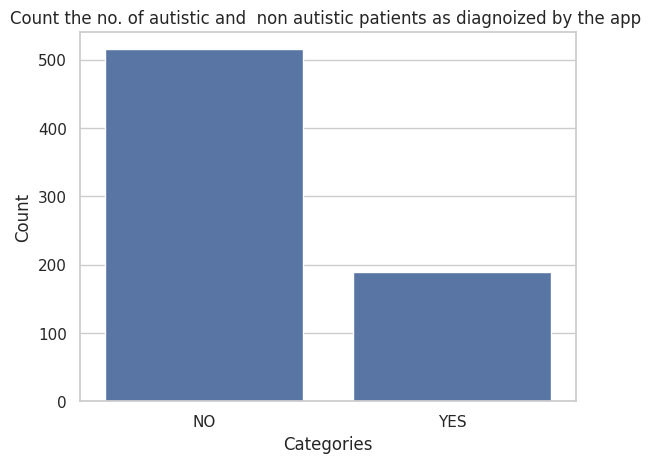

In [ ]:
sns.countplot(data=dataset, x='Class/ASD')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count the no. of autistic and  non autistic patients as diagnoized by the app ')
plt.show()

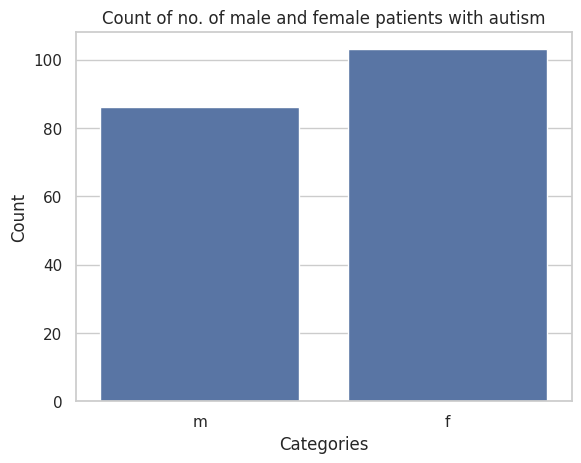

In [ ]:

autism_positive_data = dataset[dataset['Class/ASD'] == 'YES']
sns.countplot(data=autism_positive_data, x='gender')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of no. of male and female patients with autism')
plt.show()

In [ ]:
import plotly.express as plx
c=dataset[dataset['Class/ASD']=='YES']
country_count=c['contry_of_res'].value_counts().reset_index()
country_count.columns=['contry_of_res','Count']
plt=plx.bar(country_count,x='contry_of_res',y='Count',title='Autism count in diff countries')
plt.update_layout(title_text='<b> Autism count in diff countries </b>',
title_x=0.5,
xaxis=dict(categoryorder='total descending')
)
plt.show()


In [ ]:
import plotly.express as plx
c=dataset[dataset['Class/ASD']=='YES']
ethnicity_count=c['ethnicity'].value_counts().reset_index()
ethnicity_count.columns=['ethnicity','Count']
plt=plx.bar(ethnicity_count,x='ethnicity',y='Count',title='Autism count in diff ethnicities')
plt.update_layout(title_text='<b> Autism count in diff ethnicities </b>',
title_x=0.5,
xaxis=dict(categoryorder='total descending')
)
plt.show()



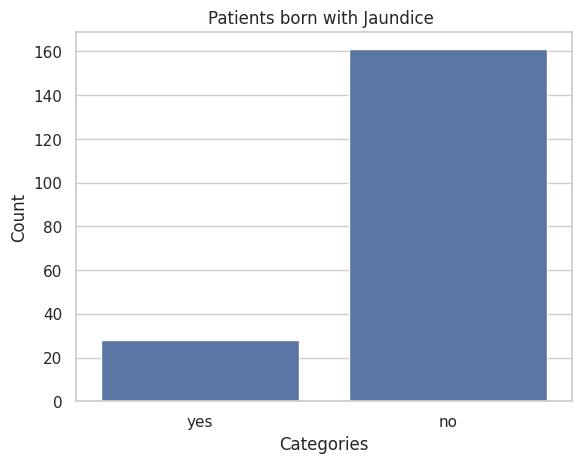

In [ ]:
import matplotlib.pyplot as plt

autism_positive_data = dataset[dataset['Class/ASD'] == 'YES']
sns.countplot(data=autism_positive_data, x='jundice')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Patients born with Jaundice ')
plt.show()

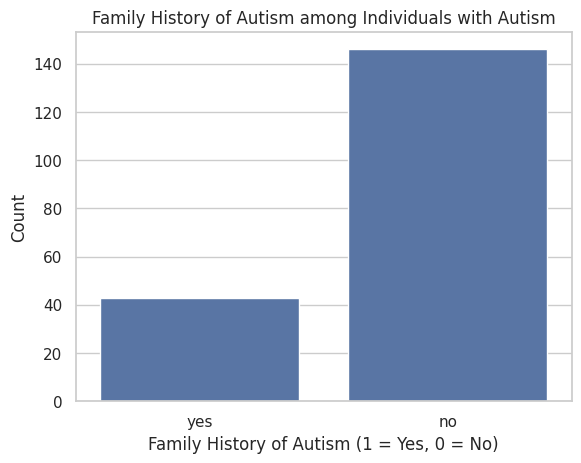

In [ ]:


autism_positive_data = dataset[dataset['Class/ASD'] == 'YES']  # Assuming 'Class/ASD' is already label encoded

# Plot the count of family history with autism for people who have autism
sns.countplot(data=autism_positive_data, x='austim')
plt.xlabel('Family History of Autism (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.title('Family History of Autism among Individuals with Autism')
plt.show()

Text(0.5, 0, 'Autism History')

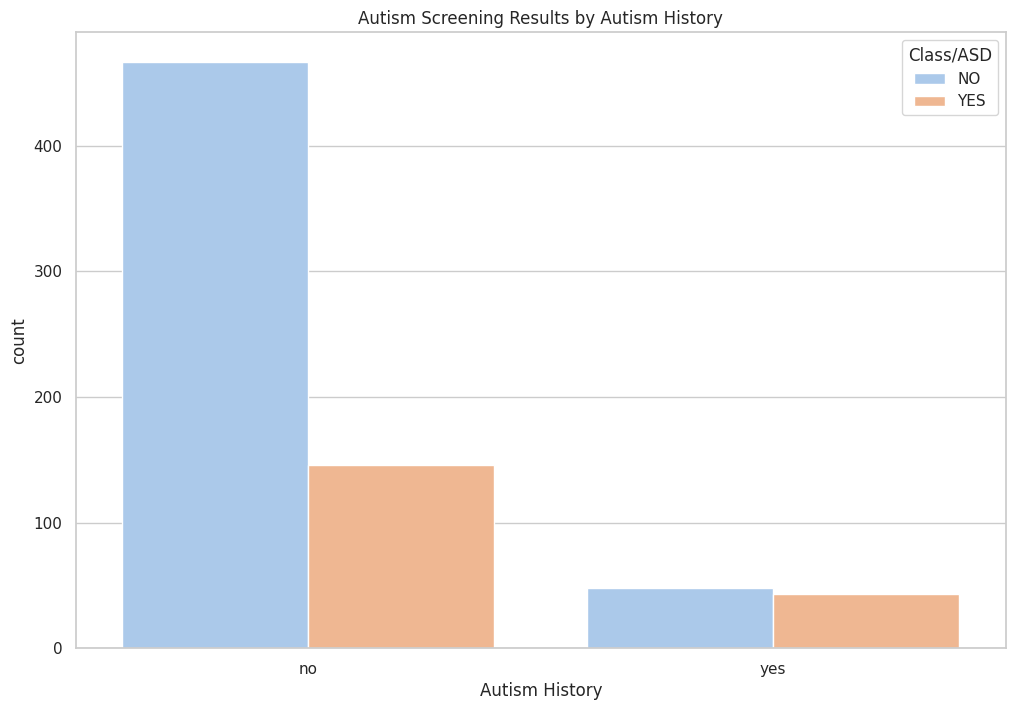

In [ ]:
#Correlation between Autism Screening results and autism history
plt.figure(figsize=(12, 8))
sns.countplot(x='austim', hue='Class/ASD', data=dataset, palette='pastel')
plt.title('Autism Screening Results by Autism History')
plt.xlabel('Autism History')



Text(0.5, 0, 'Jaundice')

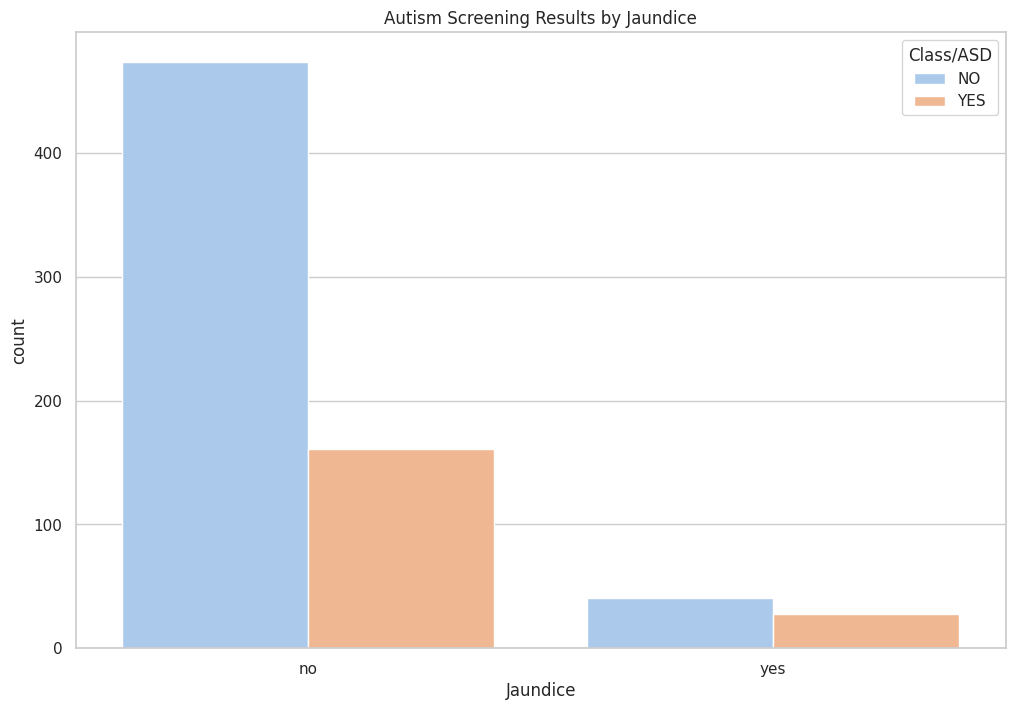

In [ ]:
#Corelation between Autism Screening and Jaundice
plt.figure(figsize=(12, 8))
sns.countplot(x='jundice', hue='Class/ASD', data=dataset, palette='pastel')
plt.title('Autism Screening Results by Jaundice')
plt.xlabel('Jaundice')

Text(0, 0.5, '')

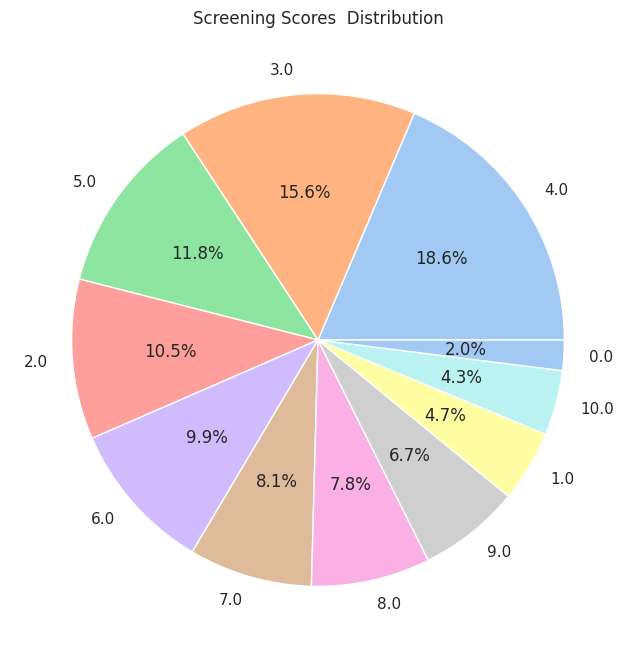

In [ ]:
plt.figure(figsize=(12,8))
dataset['result'].value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Screening Scores  Distribution')
plt.ylabel('')






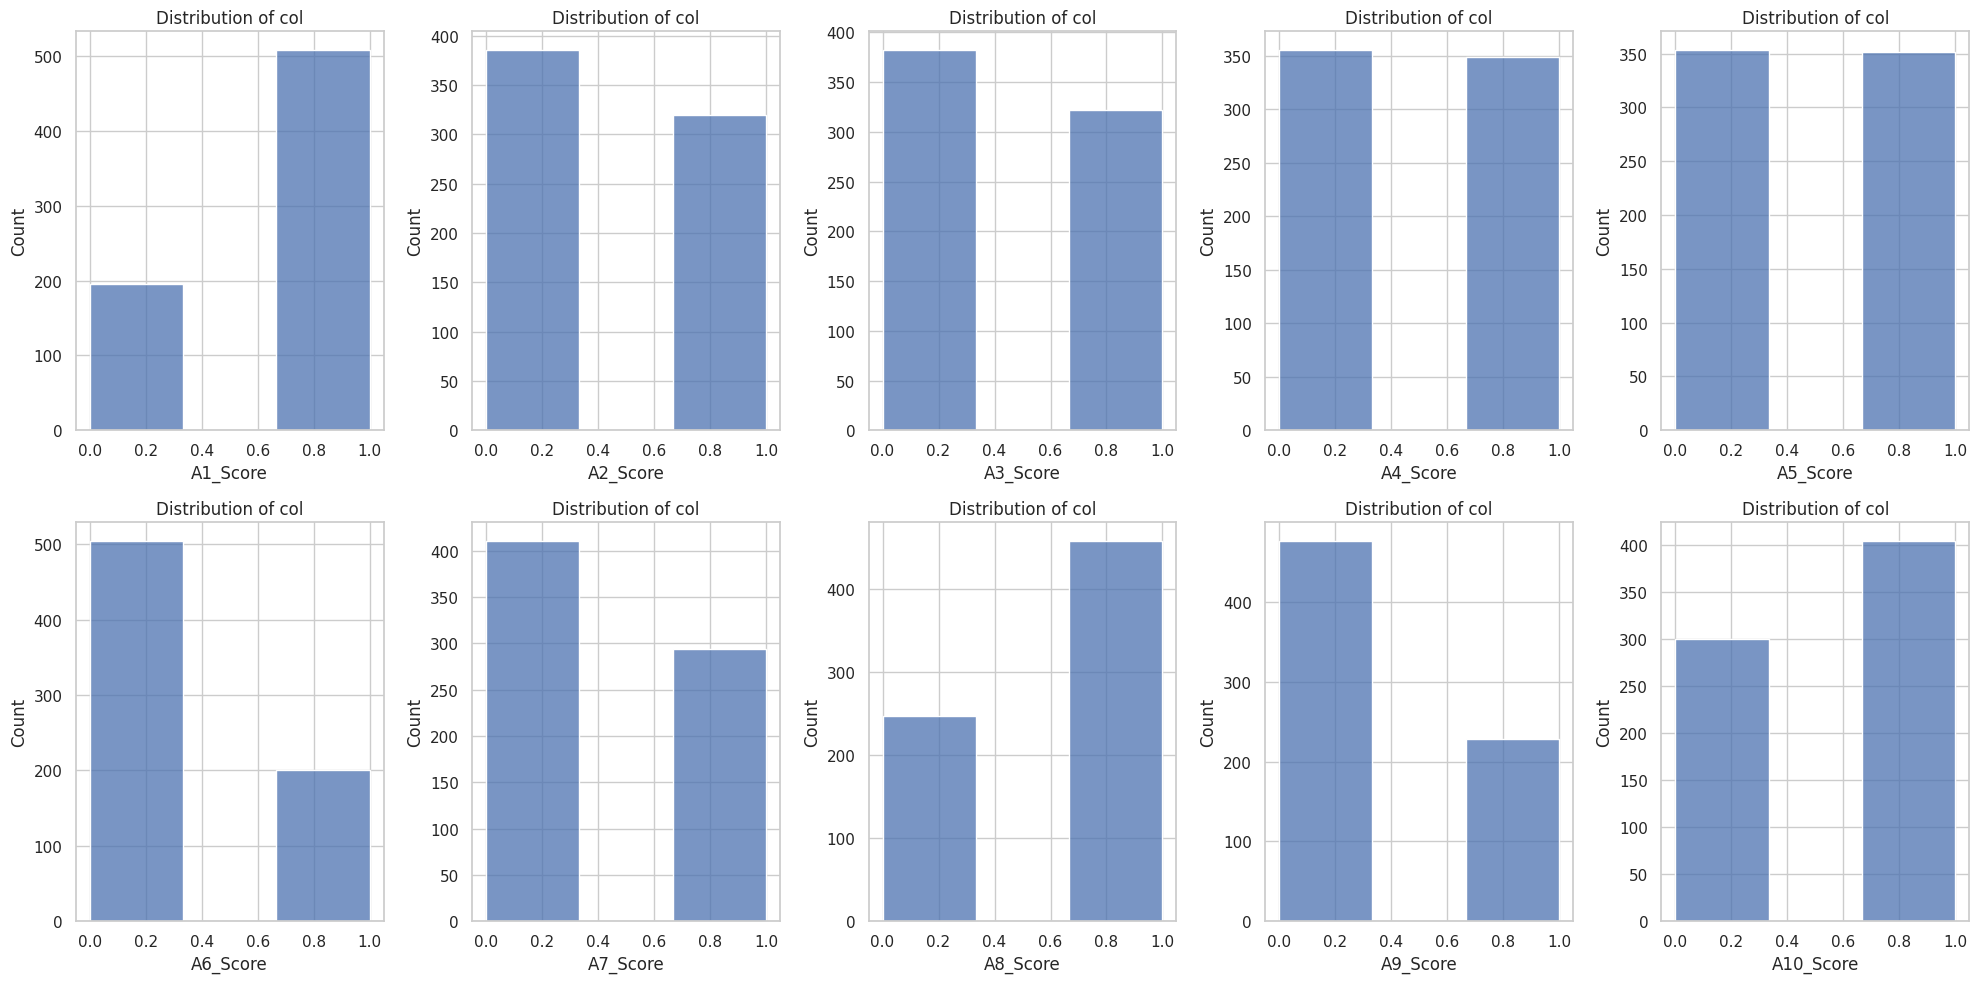

In [ ]:
fig,axes=plt.subplots(2,5,figsize=(20,10))
for i,col in enumerate(dataset.columns[:10]):
  sns.histplot(dataset[col],bins=3,kde=False,ax=axes[i//5,i%5])
  axes[i//5,i%5].set_title(f'Distribution of col')
plt.tight_layout()

<ipython-input-23-db76cf5b1d3a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Relation of Autism Screening Result with Age')

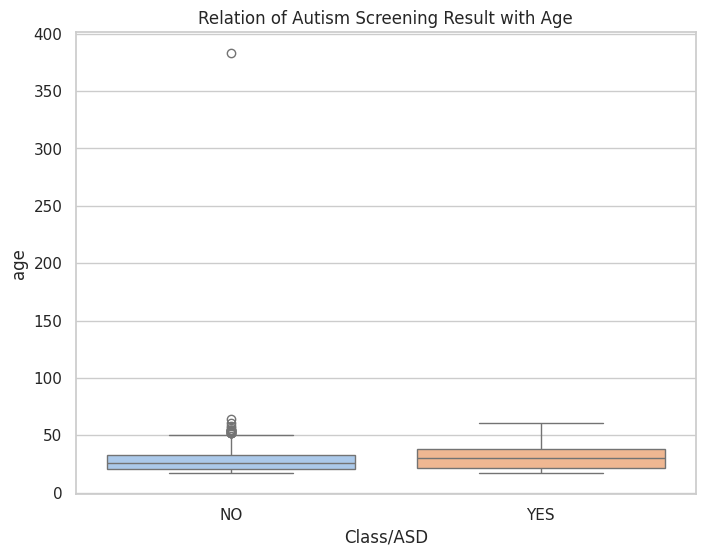

In [ ]:
#coorelation with autism screening result and age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class/ASD', y='age', data=dataset, palette='pastel')
plt.title('Relation of Autism Screening Result with Age')

In [ ]:
label_encoders = {}
for col in ['gender', 'austim', 'jundice', 'ethnicity', 'contry_of_res','Class/ASD','used_app_before','age_desc','relation']:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Print label encoders
for col, encoder in label_encoders.items():
    print(f"Label Encoder for column '{col}': {encoder}")
dataset.head()


Label Encoder for column 'gender': LabelEncoder()
Label Encoder for column 'austim': LabelEncoder()
Label Encoder for column 'jundice': LabelEncoder()
Label Encoder for column 'ethnicity': LabelEncoder()
Label Encoder for column 'contry_of_res': LabelEncoder()
Label Encoder for column 'Class/ASD': LabelEncoder()
Label Encoder for column 'used_app_before': LabelEncoder()
Label Encoder for column 'age_desc': LabelEncoder()
Label Encoder for column 'relation': LabelEncoder()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,9,0,0,64,0,6.0,0,4,0
1,1,1,0,1,0,0,0,1,0,1,...,1,3,0,1,13,0,5.0,0,4,0
2,1,1,0,1,1,0,1,1,1,1,...,1,3,1,1,56,0,8.0,0,2,1
3,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,64,0,6.0,0,4,0
4,1,0,0,0,0,0,0,1,0,0,...,0,11,0,0,22,0,2.0,0,5,0


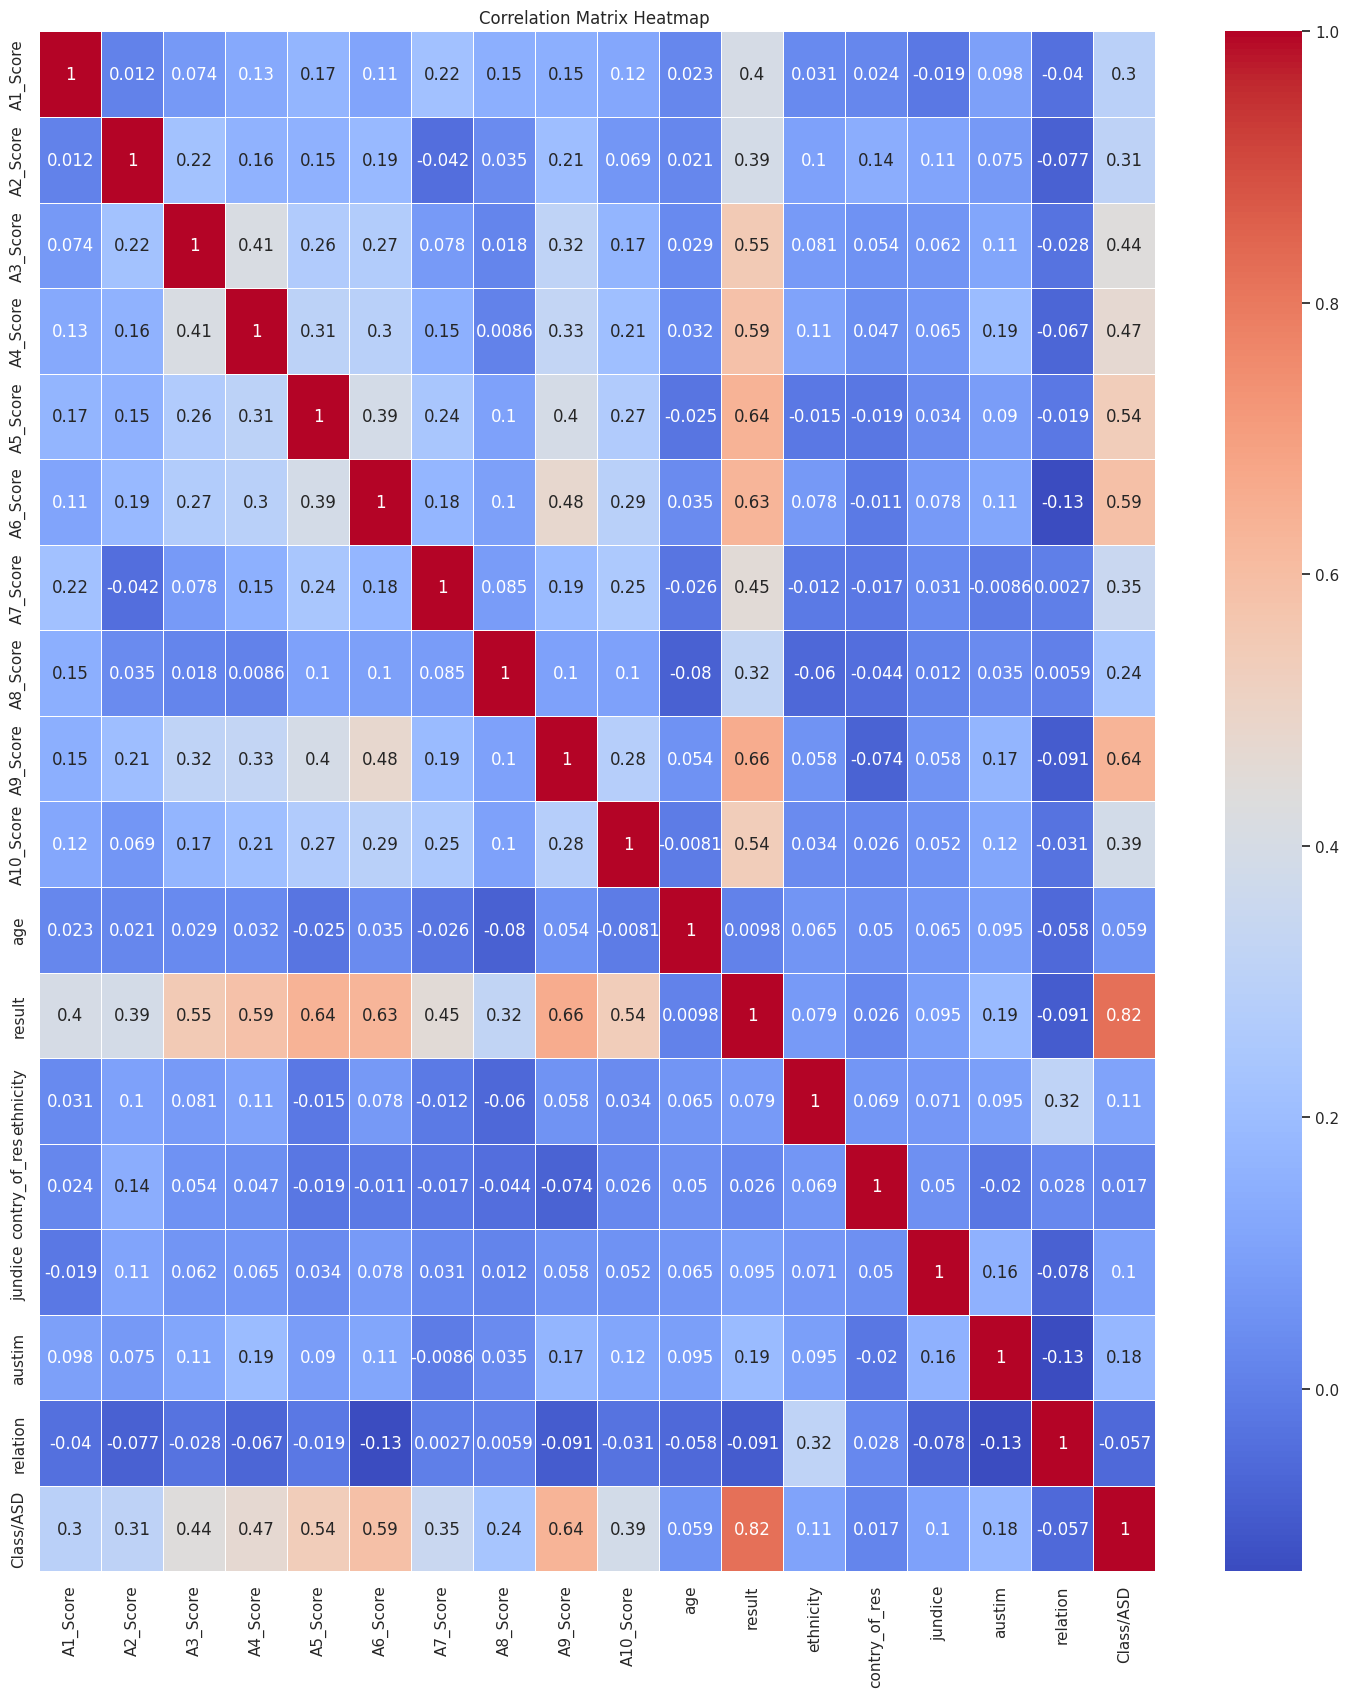

In [ ]:


correlation_matrix = dataset[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score'] + ['age', 'result', 'ethnicity', 'contry_of_res','jundice','austim','relation','Class/ASD']].corr()
plt.figure(figsize=(18,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap ')
plt.show()

In [ ]:
X=dataset.drop(columns=['Class/ASD'])
y=dataset['Class/ASD']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.62122097, -0.9067647 ,  1.09830689, ...,  0.45331013,
         0.        ,  0.10747208],
       [-1.60973317,  1.10282193, -0.91049233, ..., -1.13408193,
         0.        , -2.41044517],
       [-1.60973317,  1.10282193, -0.91049233, ...,  0.45331013,
         0.        , -2.41044517],
       ...,
       [ 0.62122097, -0.9067647 ,  1.09830689, ...,  0.85015815,
         0.        ,  1.3664307 ],
       [-1.60973317, -0.9067647 ,  1.09830689, ..., -1.13408193,
         0.        ,  0.10747208],
       [ 0.62122097, -0.9067647 , -0.91049233, ..., -0.73723392,
         0.        ,  0.10747208]])

In [ ]:
smote_enn=SMOTEENN(random_state=42)
X_train_resampled,y_train_resampled=smote_enn.fit_resample(X_train_scaled,y_train)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ann_model=Sequential()
ann_model.add(Dense(units=128,activation='relu'))
ann_model.add(Dense(units=64,activation='relu'))
ann_model.add(Dense(units=32,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann_model.fit(X_train_resampled,y_train_resampled,epochs=7,batch_size=42,validation_split=0.3,verbose=1)
loss,accuracy=ann_model.evaluate(X_test_scaled,y_test)
print(f'ANN Test Accuracy: {accuracy}')


Epoch 1/7
11/11 [==============================] - 3s 23ms/step - loss: 0.5700 - accuracy: 0.8128 - val_loss: 0.4468 - val_accuracy: 0.9077
Epoch 2/7
11/11 [==============================] - 0s 8ms/step - loss: 0.2984 - accuracy: 0.9648 - val_loss: 0.2480 - val_accuracy: 0.9590
Epoch 3/7
11/11 [==============================] - 0s 7ms/step - loss: 0.1170 - accuracy: 0.9846 - val_loss: 0.0868 - val_accuracy: 1.0000
Epoch 4/7
11/11 [==============================] - 0s 8ms/step - loss: 0.0434 - accuracy: 0.9956 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 5/7
11/11 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 0.9978 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 6/7
11/11 [==============================] - 0s 7ms/step - loss: 0.0136 - accuracy: 0.9978 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 7/7
7/7 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9811
ANN Test Accuracy: 0.9811320900917053


In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.2 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=ann_model.predict(X_test_scaled)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

7/7 [==============================] - 0s 2ms/step
[[151   4]
 [  0  57]]


43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 5/212 [00:00<?, ?it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 7/212 [00:12<02:21,  1.45it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 8/212 [00:13<03:08,  1.08it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 9/212 [00:14<03:29,  1.03s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 10/212 [00:16<03:58,  1.18s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 11/212 [00:17<03:50,  1.15s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 12/212 [00:18<03:58,  1.19s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 13/212 [00:19<03:55,  1.18s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 14/212 [00:21<04:35,  1.39s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 15/212 [00:23<05:08,  1.56s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 16/212 [00:24<04:55,  1.51s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 17/212 [00:25<04:26,  1.37s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 18/212 [00:26<04:09,  1.29s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 19/212 [00:28<04:16,  1.33s/it]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 20/212 [00:29<04:22,  1.37s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 21/212 [00:31<04:09,  1.31s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 22/212 [00:32<03:56,  1.24s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 23/212 [00:33<03:43,  1.18s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 24/212 [00:34<04:17,  1.37s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 25/212 [00:36<04:33,  1.46s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 26/212 [00:37<04:17,  1.38s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 27/212 [00:39<04:06,  1.33s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 28/212 [00:40<03:55,  1.28s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 29/212 [00:41<03:46,  1.24s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 30/212 [00:42<03:52,  1.28s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 31/212 [00:43<03:49,  1.27s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 32/212 [00:45<03:44,  1.25s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 33/212 [00:46<03:39,  1.23s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 34/212 [00:48<04:18,  1.45s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 35/212 [00:49<04:08,  1.41s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 36/212 [00:50<04:04,  1.39s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 37/212 [00:52<04:09,  1.43s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 38/212 [00:53<04:05,  1.41s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 39/212 [00:54<03:49,  1.33s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 40/212 [00:56<03:40,  1.28s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 41/212 [00:57<03:59,  1.40s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 42/212 [00:59<03:56,  1.39s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 43/212 [01:00<04:11,  1.49s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 44/212 [01:02<04:06,  1.47s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 45/212 [01:04<04:14,  1.53s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 46/212 [01:05<03:54,  1.42s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 47/212 [01:06<03:40,  1.33s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 48/212 [01:07<03:27,  1.27s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 49/212 [01:08<03:35,  1.32s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 50/212 [01:10<03:43,  1.38s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 51/212 [01:11<03:30,  1.31s/it]

48/48 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  25%|██▍       | 52/212 [01:13<04:06,  1.54s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 53/212 [01:15<04:10,  1.58s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 54/212 [01:16<03:50,  1.46s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 55/212 [01:17<03:32,  1.36s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 56/212 [01:18<03:28,  1.34s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 57/212 [01:20<03:20,  1.29s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 58/212 [01:21<03:18,  1.29s/it]

54/54 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 59/212 [01:22<03:21,  1.32s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 60/212 [01:23<03:12,  1.27s/it]

51/51 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  29%|██▉       | 61/212 [01:26<03:52,  1.54s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 62/212 [01:27<03:39,  1.46s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 63/212 [01:28<03:32,  1.43s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 64/212 [01:30<03:34,  1.45s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 65/212 [01:31<03:20,  1.37s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 66/212 [01:32<03:26,  1.41s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 67/212 [01:34<03:20,  1.39s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 68/212 [01:35<03:10,  1.32s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 69/212 [01:36<03:01,  1.27s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 70/212 [01:38<03:28,  1.47s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 71/212 [01:40<03:36,  1.53s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 72/212 [01:41<03:19,  1.43s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 73/212 [01:42<03:07,  1.35s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 74/212 [01:43<02:59,  1.30s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 75/212 [01:44<02:48,  1.23s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 76/212 [01:46<02:50,  1.25s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 77/212 [01:47<02:52,  1.28s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 78/212 [01:48<02:46,  1.24s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 79/212 [01:50<02:57,  1.33s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 80/212 [01:51<03:17,  1.50s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 81/212 [01:53<03:22,  1.55s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 82/212 [01:54<03:13,  1.49s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 83/212 [01:56<03:03,  1.43s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 84/212 [01:57<02:58,  1.39s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 85/212 [01:59<03:02,  1.44s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 86/212 [02:00<02:51,  1.36s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 87/212 [02:01<02:40,  1.28s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 88/212 [02:03<03:07,  1.51s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 89/212 [02:04<03:03,  1.49s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 90/212 [02:06<02:48,  1.38s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 91/212 [02:07<02:53,  1.43s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 92/212 [02:08<02:43,  1.36s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 93/212 [02:09<02:36,  1.32s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 94/212 [02:11<02:29,  1.27s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▍     | 95/212 [02:12<02:31,  1.30s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 96/212 [02:13<02:27,  1.27s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 97/212 [02:15<02:36,  1.36s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 98/212 [02:17<02:53,  1.52s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 99/212 [02:18<02:42,  1.44s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 100/212 [02:19<02:42,  1.45s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 101/212 [02:21<02:31,  1.36s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 102/212 [02:22<02:22,  1.30s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▊     | 103/212 [02:23<02:14,  1.24s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 104/212 [02:24<02:22,  1.32s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 105/212 [02:26<02:23,  1.34s/it]

49/49 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  50%|█████     | 106/212 [02:27<02:33,  1.45s/it]

49/49 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  50%|█████     | 107/212 [02:29<02:49,  1.61s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 108/212 [02:31<02:33,  1.48s/it]

53/53 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████▏    | 109/212 [02:32<02:33,  1.49s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 110/212 [02:33<02:25,  1.43s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 111/212 [02:34<02:15,  1.34s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 112/212 [02:36<02:23,  1.44s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 113/212 [02:37<02:13,  1.35s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 114/212 [02:39<02:17,  1.40s/it]

51/51 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  54%|█████▍    | 115/212 [02:41<02:26,  1.51s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 116/212 [02:42<02:31,  1.58s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 117/212 [02:44<02:21,  1.49s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 118/212 [02:45<02:10,  1.39s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 119/212 [02:46<02:09,  1.39s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 120/212 [02:48<02:20,  1.53s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 121/212 [02:49<02:10,  1.43s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 122/212 [02:50<02:00,  1.34s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 123/212 [02:52<02:07,  1.43s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 124/212 [02:54<02:23,  1.63s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 125/212 [02:56<02:23,  1.65s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 126/212 [02:57<02:08,  1.50s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 127/212 [02:58<01:58,  1.39s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 128/212 [02:59<01:50,  1.31s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 129/212 [03:00<01:47,  1.29s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████▏   | 130/212 [03:02<01:46,  1.30s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 131/212 [03:03<01:42,  1.27s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 132/212 [03:04<01:39,  1.24s/it]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|██████▎   | 133/212 [03:06<01:51,  1.41s/it]

53/53 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 134/212 [03:08<02:02,  1.57s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 135/212 [03:09<01:53,  1.48s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 136/212 [03:10<01:44,  1.38s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▍   | 137/212 [03:12<01:53,  1.51s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 138/212 [03:13<01:44,  1.42s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 139/212 [03:14<01:37,  1.34s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 140/212 [03:16<01:31,  1.27s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 141/212 [03:17<01:26,  1.21s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 142/212 [03:18<01:36,  1.37s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 143/212 [03:20<01:42,  1.48s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 144/212 [03:21<01:36,  1.42s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 145/212 [03:22<01:28,  1.33s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 146/212 [03:24<01:29,  1.35s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 147/212 [03:26<01:33,  1.44s/it]

53/53 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 148/212 [03:27<01:31,  1.43s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 149/212 [03:28<01:24,  1.34s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 150/212 [03:29<01:20,  1.29s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 151/212 [03:31<01:24,  1.39s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 152/212 [03:33<01:32,  1.53s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 153/212 [03:34<01:24,  1.43s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 154/212 [03:35<01:22,  1.42s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 155/212 [03:37<01:16,  1.34s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 156/212 [03:38<01:13,  1.31s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 157/212 [03:39<01:15,  1.38s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 158/212 [03:40<01:11,  1.32s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 159/212 [03:42<01:13,  1.39s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 160/212 [03:44<01:19,  1.53s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 161/212 [03:46<01:19,  1.56s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 162/212 [03:47<01:14,  1.49s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 163/212 [03:48<01:13,  1.50s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 164/212 [03:50<01:07,  1.40s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 165/212 [03:51<01:01,  1.31s/it]

54/54 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 166/212 [03:52<01:04,  1.40s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 167/212 [03:53<00:59,  1.33s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 168/212 [03:55<01:01,  1.39s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  80%|███████▉  | 169/212 [03:57<01:06,  1.54s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 170/212 [03:59<01:07,  1.60s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 171/212 [04:00<01:03,  1.56s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 172/212 [04:01<00:57,  1.43s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 173/212 [04:02<00:54,  1.40s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 174/212 [04:04<00:54,  1.44s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 175/212 [04:05<00:50,  1.36s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 176/212 [04:06<00:46,  1.29s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 177/212 [04:07<00:43,  1.24s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 178/212 [04:10<00:50,  1.49s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 179/212 [04:11<00:49,  1.50s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 180/212 [04:12<00:45,  1.41s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 181/212 [04:14<00:42,  1.38s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 182/212 [04:15<00:40,  1.36s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 183/212 [04:16<00:38,  1.33s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 184/212 [04:17<00:35,  1.28s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 185/212 [04:18<00:33,  1.23s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 186/212 [04:20<00:32,  1.25s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 187/212 [04:21<00:33,  1.35s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▊ | 188/212 [04:23<00:35,  1.47s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 189/212 [04:24<00:31,  1.36s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 190/212 [04:26<00:31,  1.45s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 191/212 [04:27<00:28,  1.36s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 192/212 [04:28<00:25,  1.30s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 193/212 [04:30<00:25,  1.35s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 194/212 [04:31<00:23,  1.28s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 195/212 [04:33<00:25,  1.50s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  92%|█████████▏| 196/212 [04:35<00:25,  1.61s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 197/212 [04:36<00:23,  1.60s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 198/212 [04:37<00:21,  1.51s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 199/212 [04:39<00:18,  1.43s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 200/212 [04:40<00:16,  1.40s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▍| 201/212 [04:41<00:14,  1.32s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 202/212 [04:43<00:13,  1.39s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 203/212 [04:44<00:11,  1.33s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 204/212 [04:45<00:10,  1.30s/it]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  97%|█████████▋| 205/212 [04:47<00:10,  1.53s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 206/212 [04:49<00:09,  1.61s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 207/212 [04:50<00:07,  1.47s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 208/212 [04:52<00:06,  1.54s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▊| 209/212 [04:54<00:04,  1.58s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 210/212 [04:55<00:03,  1.58s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 211/212 [04:56<00:01,  1.51s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 212/212 [04:58<00:00,  1.46s/it]

49/49 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 213it [05:00,  1.44s/it]


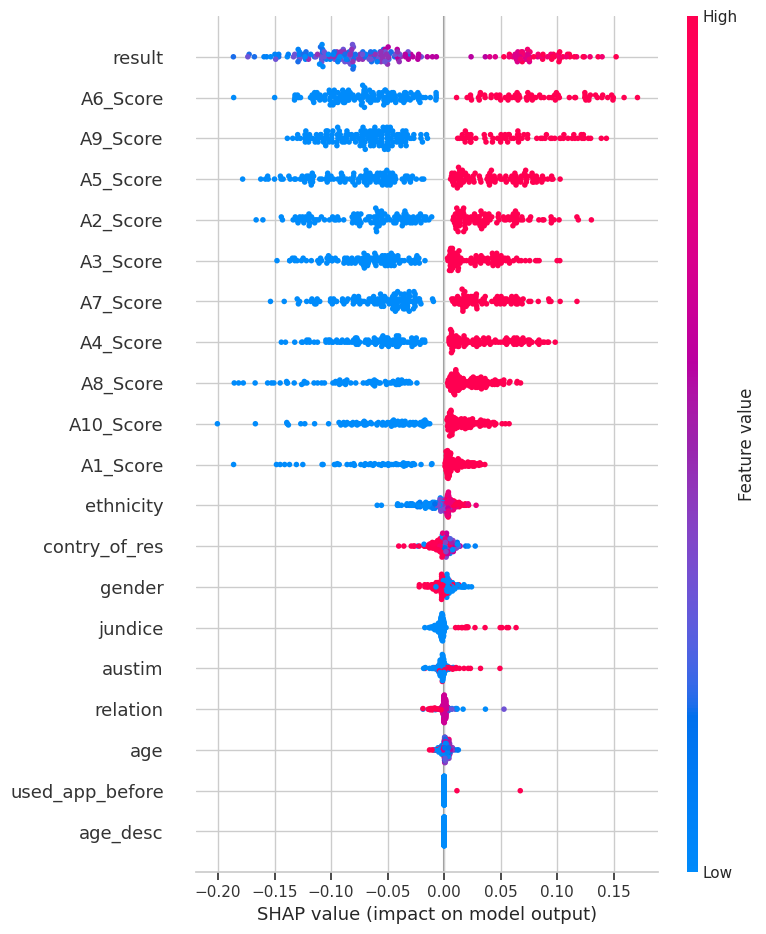

In [ ]:
import  shap
explainer=shap.Explainer(ann_model.predict,X_train_resampled)
shap_values=explainer.shap_values(X_test_scaled)
feature_names=dataset.columns[:-1]
shap.summary_plot(shap_values, X_test_scaled,feature_names=feature_names)
